<a href="https://colab.research.google.com/github/harshelke180502/Transformers/blob/main/Feed_Forward_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

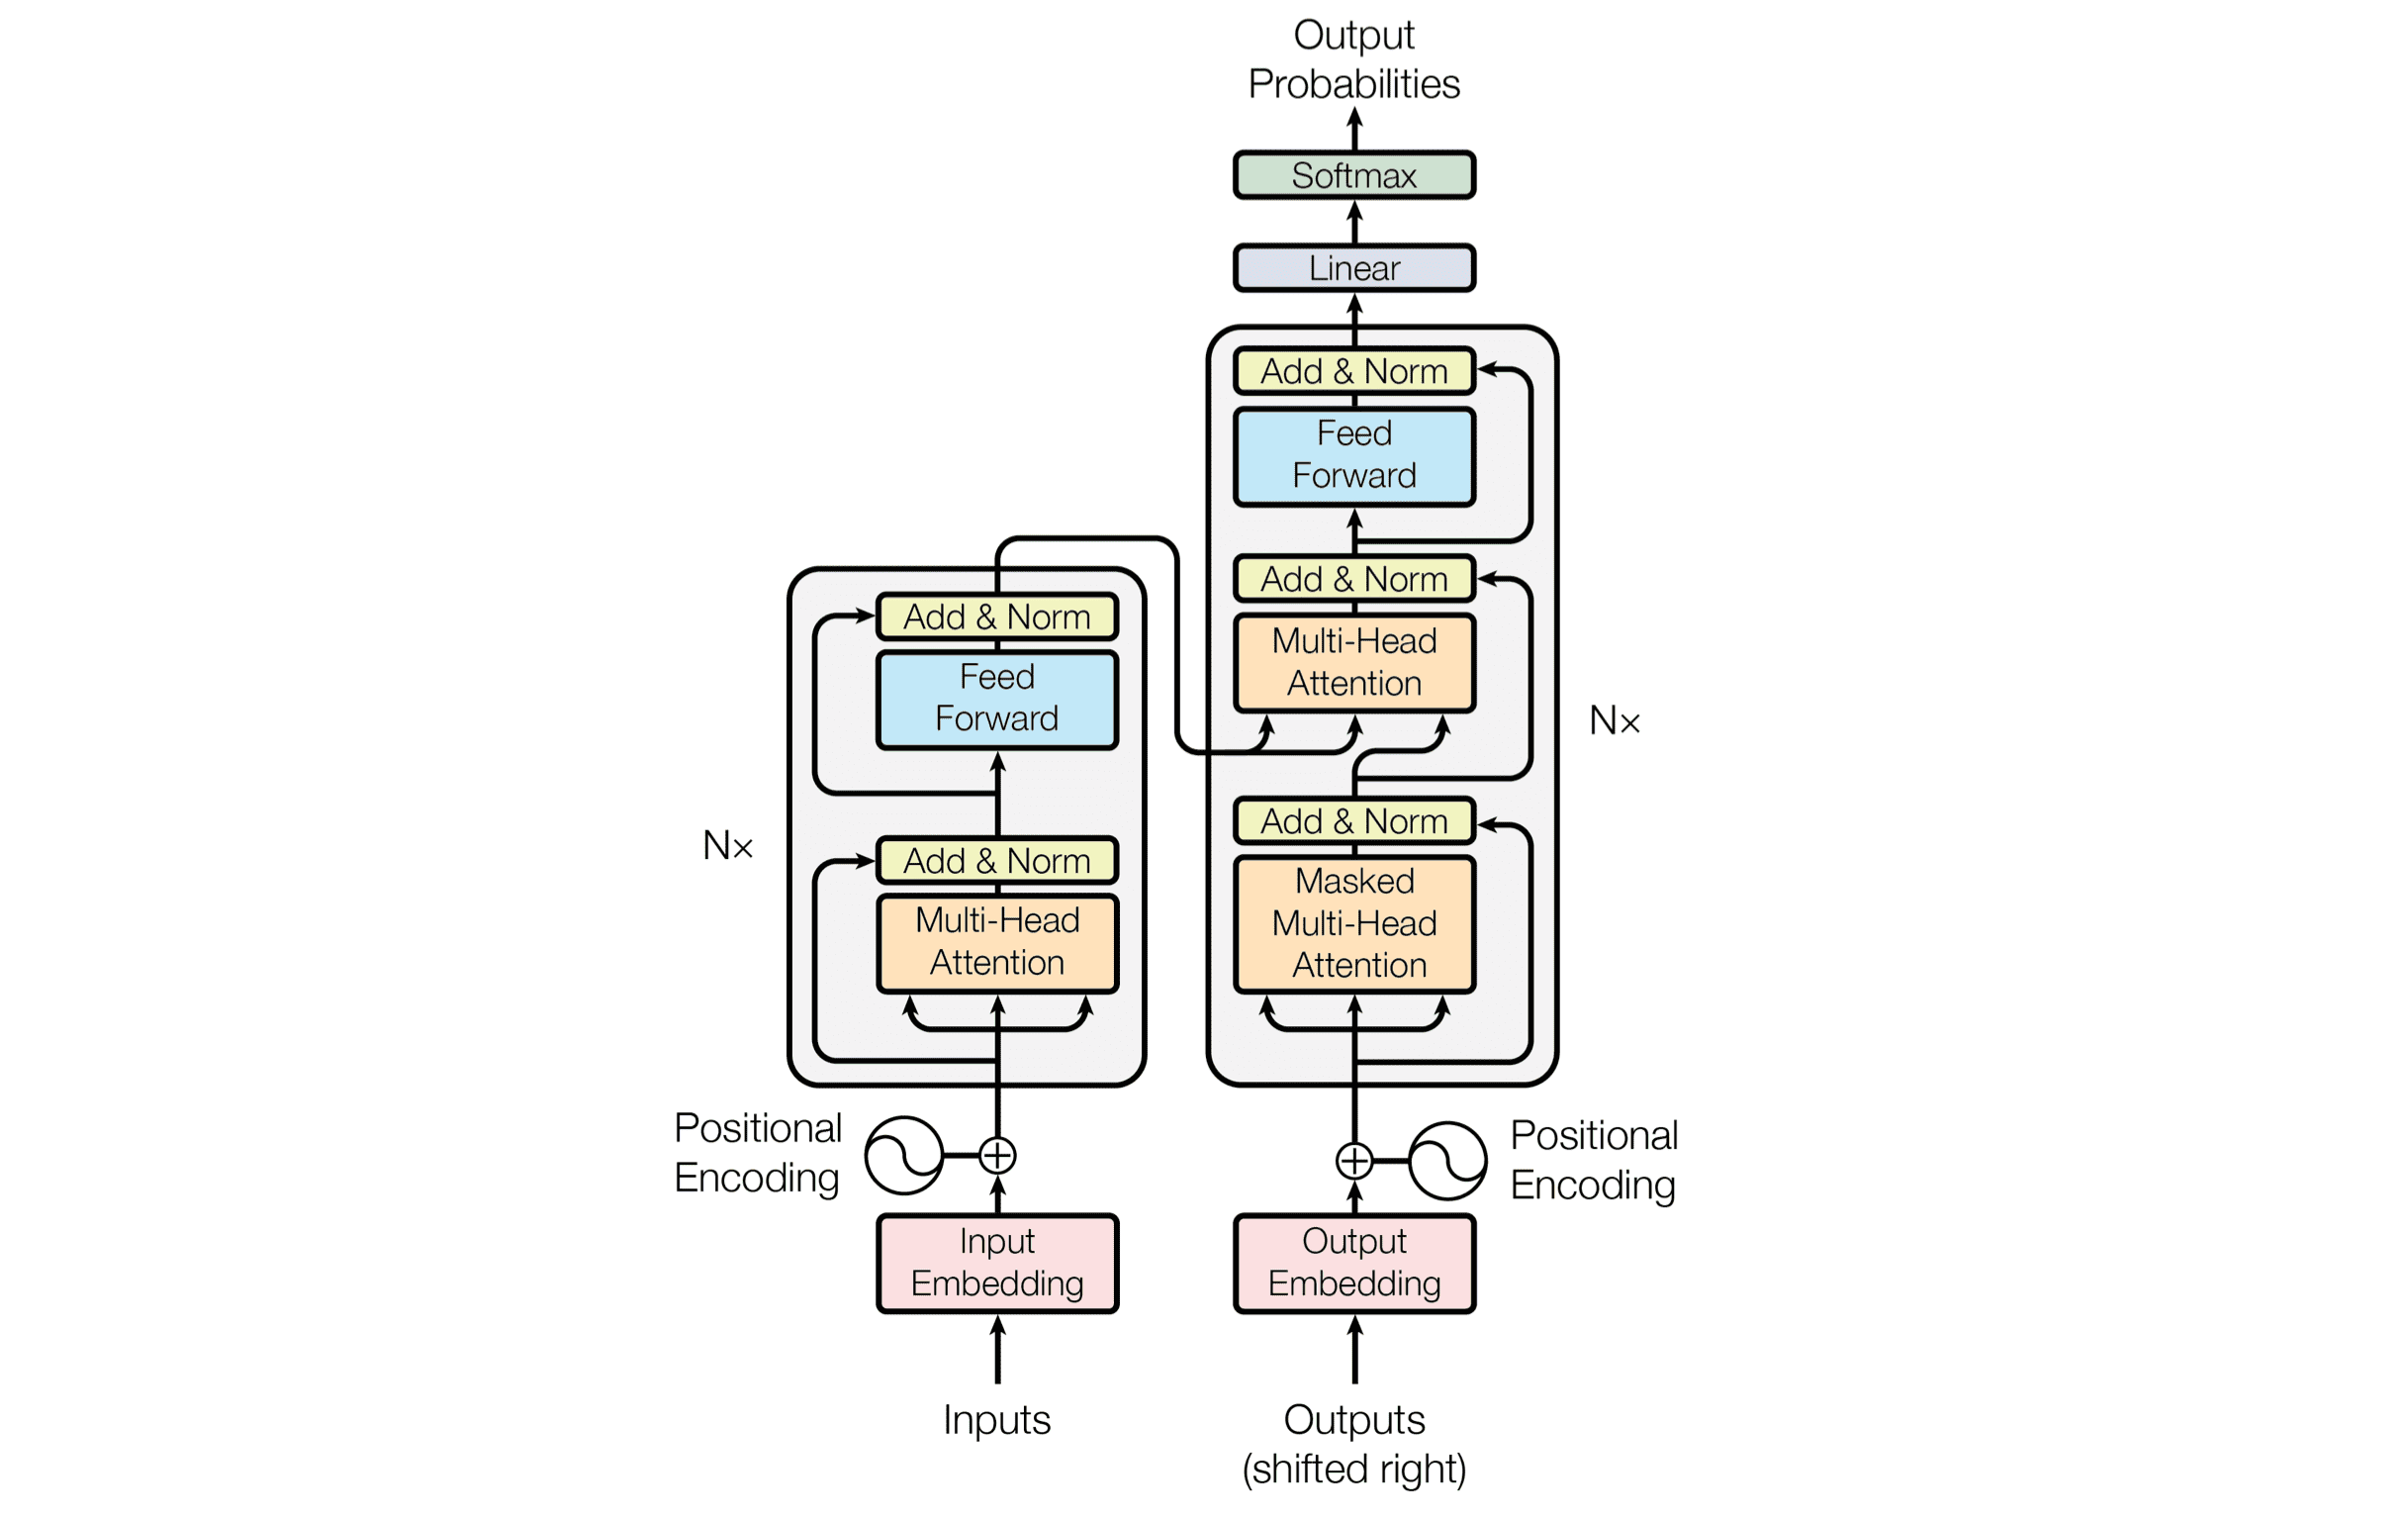

In [2]:
from transformers import AutoTokenizer, AutoModel
import torch

# Step 1: Input text
text = " I am Harsh Shelke studying in UI"




### Feed Forward Layer



---

## 🧩 Recap: FeedForward Structure

In Transformers, each token (a vector of size `input_dim`) passes through:

```text
Linear(input_dim → hidden_dim) → ReLU → Linear(hidden_dim → input_dim)
```

This is done **independently for each token** (row-wise).

---

## 🔧 Example Setup

Let’s define:

* `input_dim = 4` (like embedding size)
* `hidden_dim = 6` (can be 2× or 4× larger — we choose 6 here)
* We’ll pass **2 tokens** (like a batch of 2 inputs)

### Input `x`:

```python
x = [
  [1.0, 2.0, 3.0, 4.0],    # Token 1
  [4.0, 3.0, 2.0, 1.0]     # Token 2
]
Shape: (2, 4)
```

---

## ✅ Step 1: First Linear Layer

Let’s define:

* Weight `W1`: shape `(6, 4)` — we map 4 → 6
* Bias `b1`: shape `(6,)`

### Example weights and bias (manually fixed for clarity):

```python
W1 = [
  [1, 0, 0, 0],     # row 0
  [0, 1, 0, 0],     # row 1
  [0, 0, 1, 0],     # row 2
  [0, 0, 0, 1],     # row 3
  [1, 1, 1, 1],     # row 4
  [-1, -1, -1, -1]  # row 5
]
b1 = [0, 0, 0, 0, 0, 0]
```

---

### 🔹 Compute Linear1 output: `x @ W1.T + b1`

We apply this to each row of `x`.

---

### 🔸 For Token 1: `[1, 2, 3, 4]`

Compute dot products:

```
z1 = [
  1*1 + 0 + 0 + 0     = 1,
  0 + 2*1 + 0 + 0     = 2,
  0 + 0 + 3*1 + 0     = 3,
  0 + 0 + 0 + 4*1     = 4,
  1+2+3+4             = 10,
  -1-2-3-4            = -10
]
```

So:

```
Linear1 output (Token 1): [1, 2, 3, 4, 10, -10]
```

---

### 🔸 For Token 2: `[4, 3, 2, 1]`

```
z2 = [
  4,
  3,
  2,
  1,
  4+3+2+1   = 10,
  -4-3-2-1  = -10
]
```

---

So overall `Linear1` output:

```python
[
  [1, 2, 3, 4, 10, -10],
  [4, 3, 2, 1, 10, -10]
]
Shape: (2, 6)
```

---

## ✅ Step 2: Apply ReLU Activation

### ReLU(x) = max(0, x)

So we zero out the negatives:

```python
[
  [1, 2, 3, 4, 10,  0],
  [4, 3, 2, 1, 10,  0]
]
```

---

## ✅ Step 3: Second Linear Layer

Now we need:

* `W2`: shape `(4, 6)` — projects 6 → 4
* `b2`: shape `(4,)`

### Example weights:

Let’s say:

```python
W2 = [
  [1, 0, 0, 0, 0, 0],     # picks dim 0
  [0, 1, 0, 0, 0, 0],     # picks dim 1
  [0, 0, 1, 0, 0, 0],     # picks dim 2
  [0, 0, 0, 0, 1, 0]      # picks dim 4
]
b2 = [0, 0, 0, 0]
```

---

### 🔸 For Token 1: `[1, 2, 3, 4, 10, 0]`

```
Output:
[
  1,      # dim 0
  2,      # dim 1
  3,      # dim 2
  10      # dim 4
]
```

---

### 🔸 For Token 2: `[4, 3, 2, 1, 10, 0]`

```
Output:
[
  4,
  3,
  2,
  10
]
```

---

## ✅ Final Output of FeedForward

```python
[
  [1, 2, 3, 10],
  [4, 3, 2, 10]
]
Shape: (2, 4)
```

---

## 🧠 Why Is This Useful?

Each token embedding:

* Gets **processed non-linearly**
* Learns **high-level abstractions** via MLP
* Doesn’t mix across tokens (purely local)

### 🔍 In Transformer:

* **Self-attention** mixes tokens
* **FFN** enhances each token representation **individually**

---

## 🧠 Real-World Analogy

Imagine each token is a **person**. After listening to everyone else in the room via **self-attention**, each person now does **personal reflection** through an FFN:

* "What do I think now?"
* "Should I emphasize this trait?"
* "Should I downplay this?"

---

## ✅ Summary Table

| Step    | Shape Change    | Operation        | Purpose                                  |
| ------- | --------------- | ---------------- | ---------------------------------------- |
| Input   | (B, D)          | —                | Each token is a vector                   |
| Linear1 | (B, D) → (B, H) | Dense transform  | Learn richer features                    |
| ReLU    | (B, H) → (B, H) | Non-linearity    | Introduce non-linear features            |
| Linear2 | (B, H) → (B, D) | Dense projection | Return to original shape (residual path) |

---



In [3]:
import torch

class FeedForwardScratch:
    def __init__(self, d_model, d_ff):
        self.d_model = d_model
        self.d_ff = d_ff

        # Initialize weights and biases manually
        self.W1 = torch.randn(d_model, d_ff) * (1.0 / (d_model ** 0.5))
        self.b1 = torch.zeros(d_ff)

        self.W2 = torch.randn(d_ff, d_model) * (1.0 / (d_ff ** 0.5))
        self.b2 = torch.zeros(d_model)

    def relu(self, x):
        return torch.maximum(x, torch.zeros_like(x))

    def forward(self, x):
        # x shape: (batch_size, seq_len, d_model)

        # Linear1: (batch, seq_len, d_model) @ (d_model, d_ff) → (batch, seq_len, d_ff)
        x1 = torch.matmul(x, self.W1) + self.b1  # Add bias manually (broadcasting)
        x1 = self.relu(x1)

        # Linear2: (batch, seq_len, d_ff) @ (d_ff, d_model) → (batch, seq_len, d_model)
        out = torch.matmul(x1, self.W2) + self.b2

        return out


In [4]:
# Parameters
batch_size = 2
seq_len = 4
d_model = 8
d_ff = 16

# Dummy input
x = torch.randn(batch_size, seq_len, d_model)

# Feed Forward Network from scratch
ffn = FeedForwardScratch(d_model=d_model, d_ff=d_ff)
output = ffn.forward(x)

print("Input shape:", x.shape)
print("Output shape:", output.shape)


Input shape: torch.Size([2, 4, 8])
Output shape: torch.Size([2, 4, 8])


In [6]:
import torch
import torch.nn as nn

# Define the FeedForward layer
class FeedForward(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(FeedForward, self).__init__()

        # First Linear Layer: Input to Hidden
        self.linear1 = nn.Linear(input_dim, hidden_dim)

        # Activation Function: ReLU
        self.relu = nn.ReLU()

        # Second Linear Layer: Hidden to Output (same as input dim usually in transformers)
        self.linear2 = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        # Step 1: Apply first linear layer
        x = self.linear1(x)

        # Step 2: Apply ReLU activation
        x = self.relu(x)

        # Step 3: Apply second linear layer
        x = self.linear2(x)

        return x

# Example usage
if __name__ == "__main__":
    # Dummy input: batch size = 2, input dimension = 4
    x = torch.tensor([[1.0, 2.0, 3.0, 4.0],
                      [4.0, 3.0, 2.0, 1.0]], dtype=torch.float32)

    # Define the feedforward layer (input_dim=4, hidden_dim=8)
    ff = FeedForward(input_dim=4, hidden_dim=8)

    # Forward pass
    output = ff(x)

    print("Input:\n", x)
    print("\nOutput:\n", output)

Input:
 tensor([[1., 2., 3., 4.],
        [4., 3., 2., 1.]])

Output:
 tensor([[-0.7730,  0.4283, -0.9496, -0.0434],
        [-1.0264,  0.0553, -0.3101, -0.4782]], grad_fn=<AddmmBackward0>)


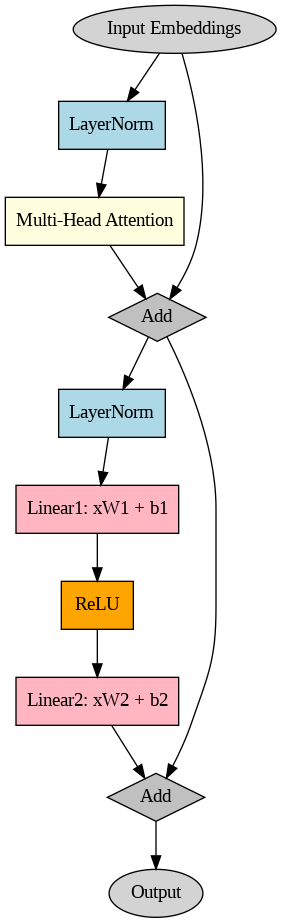

In [7]:
from graphviz import Digraph
from IPython.display import Image, display

dot = Digraph(format='png')
dot.attr(rankdir='TB')

# Inputs
dot.node('Input', 'Input Embeddings', shape='ellipse', style='filled', fillcolor='lightgray')

# Multi-head attention block
dot.node('Norm1', 'LayerNorm', shape='box', fillcolor='lightblue', style='filled')
dot.node('MHA', 'Multi-Head Attention', shape='box', fillcolor='lightyellow', style='filled')
dot.node('Add1', 'Add', shape='diamond', fillcolor='gray', style='filled')

# Feed Forward block
dot.node('Norm2', 'LayerNorm', shape='box', fillcolor='lightblue', style='filled')
dot.node('FF1', 'Linear1: xW1 + b1', shape='box', fillcolor='lightpink', style='filled')
dot.node('ReLU', 'ReLU', shape='box', fillcolor='orange', style='filled')
dot.node('FF2', 'Linear2: xW2 + b2', shape='box', fillcolor='lightpink', style='filled')
dot.node('Add2', 'Add', shape='diamond', fillcolor='gray', style='filled')
dot.node('Output', 'Output', shape='ellipse', fillcolor='lightgray', style='filled')

# Connections
dot.edges([('Input', 'Norm1'), ('Norm1', 'MHA'), ('MHA', 'Add1'), ('Input', 'Add1')])
dot.edge('Add1', 'Norm2')
dot.edge('Norm2', 'FF1')
dot.edge('FF1', 'ReLU')
dot.edge('ReLU', 'FF2')
dot.edge('FF2', 'Add2')
dot.edge('Add1', 'Add2')  # residual connection
dot.edge('Add2', 'Output')

# Display in Jupyter Notebook
img_bytes = dot.pipe(format='png')
display(Image(img_bytes))
